# **Credit Card Fraud Detection using Scikit-Learn and Snap ML**
--------------

## Objectives


- Perform basic data preprocessing in Python
- Model a classification task using the Scikit-Learn and Snap ML Python APIs
- Train Suppport Vector Machine and Decision Tree models using Scikit-Learn and Snap ML
- Run inference and assess the quality of the trained models


## Table of Contents


<div>
    <ol>
        <li><a href="#introduction">Introduction</a></li>
        <li><a href="#import_libraries">Import Libraries</a></li>
        <li><a href="#dataset_analysis">Dataset Analysis</a></li>
        <li><a href="#dataset_preprocessing">Dataset Preprocessing</a></li>
        <li><a href="#dataset_split">Dataset Train/Test Split</a></li>
        <li><a href="#dt_sklearn">Build a Decision Tree Classifier model with Scikit-Learn</a></li>
        <li><a href="#dt_snap">Build a Decision Tree Classifier model with Snap ML</a></li>
        <li><a href="#dt_sklearn_snap">Evaluate the Scikit-Learn and Snap ML Decision Tree Classifiers</a></li>
        <li><a href="#svm_sklearn">Build a Support Vector Machine model with Scikit-Learn</a></li>
        <li><a href="#svm_snap">Build a Support Vector Machine model with Snap ML</a></li>
        <li><a href="#svm_sklearn_snap">Evaluate the Scikit-Learn and Snap ML Support Vector Machine Models</a></li>
    </ol>
</div>

-------------------

<div id="Introduction">
    <h2>Introduction</h2>
    <br>Imagine that you work for a financial institution and part of your job is to build a model that predicts if a credit card transaction is fraudulent or not. You can model the problem as a binary classification problem. A transaction belongs to the positive class (1) if it is a fraud, otherwise it belongs to the negative class (0).
    <br>
    <br>You have access to transactions that occured over a certain period of time. The majority of the transactions are normally legitimate and only a small fraction are non-legitimate. Thus, typically you have access to a dataset that is highly unbalanced. This is also the case of the current dataset: only 492 transactions out of 284,807 are fraudulent (the positive class - the frauds - accounts for 0.172% of all transactions).
    <br>
    <br>To train the model you can use part of the input dataset and the remaining data can be used to assess the quality of the trained model. First, let's download the dataset.
    <br>
</div>


In [2]:
# install the opendatasets package
!pip install opendatasets

In [3]:
import opendatasets as od

# downloadinf the dataset (this is a Kaggle dataset)
# during download input of Kaggle username and password is required
od.download("https://www.kaggle.com/mlg-ulb/creditcardfraud")

Skipping, found downloaded files in "./creditcardfraud" (use force=True to force download)


<div id="import_libraries">
    <h2>Import Libraries</h2>
</div>


In [4]:
# Snap ML is available on PyPI. To install it simply run the pip command below.
!pip install snapml

In [5]:
!pip install --upgrade scikit-learn numpy pandas matplotlib

  Using cached numpy-2.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.


In [6]:
!pip install --upgrade scipy

  Using cached scipy-1.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached scipy-1.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (41.2 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


In [7]:
!pip install --upgrade numpy==1.24.3 scipy==1.10.1 scikit-learn

  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.19 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
albumentations 1.4.20 requires nump

In [8]:
# Import the libraries we need to use in this lab
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
import time
import warnings
warnings.filterwarnings('ignore')

<div id="dataset_analysis">
    <h2>Dataset Analysis</h2>
</div>


In this section you will read the dataset in a Pandas dataframe and visualize its content. You will also look at some data statistics.

Note: A Pandas dataframe is a two-dimensional, size-mutable, potentially heterogeneous tabular data structure. For more information: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html.


In [9]:
# read the input data
raw_data = pd.read_csv('creditcardfraud/creditcard.csv')
print("There are " + str(len(raw_data)) + " observations in the credit card fraud dataset.")
print("There are " + str(len(raw_data.columns)) + " variables in the dataset.")

# display the first rows in the dataset
raw_data.head()

There are 284807 observations in the credit card fraud dataset.
There are 31 variables in the dataset.


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In practice, a financial institution may have access to a much larger dataset of transactions. To simulate such a case, we will inflate the original one 10 times.


In [10]:
n_replicas = 10

# inflate the original dataset
big_raw_data = pd.DataFrame(np.repeat(raw_data.values, n_replicas, axis=0), columns=raw_data.columns)

print("There are " + str(len(big_raw_data)) + " observations in the inflated credit card fraud dataset.")
print("There are " + str(len(big_raw_data.columns)) + " variables in the dataset.")

# display first rows in the new dataset
big_raw_data.head()

There are 2848070 observations in the inflated credit card fraud dataset.
There are 31 variables in the dataset.


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
2   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
3   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
4   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
2  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
3  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
4  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62    0.0  
1 -0.189115  0.133558 -0.021053  149.62    0.0  
2 -0.189115  0.133558 -0.021053  149.62    0.0  
3 -0.189115  0.133558 -0.021053  149.62    0.0  
4 -0.189115  0.133558 -0.021053  149.62    0.0  

[5 rows x 31 columns]

Each row in the dataset represents a credit card transaction. As shown above, each row has 31 variables. One variable (the last variable in the table above) is called Class and represents the target variable. Your objective will be to train a model that uses the other variables to predict the value of the Class variable. Let's first retrieve basic statistics about the target variable.

Note: For confidentiality reasons, the original names of most features are anonymized V1, V2 .. V28. The values of these features are the result of a PCA transformation and are numerical. The feature 'Class' is the target variable and it takes two values: 1 in case of fraud and 0 otherwise. For more information about the dataset please visit this webpage: https://www.kaggle.com/mlg-ulb/creditcardfraud.


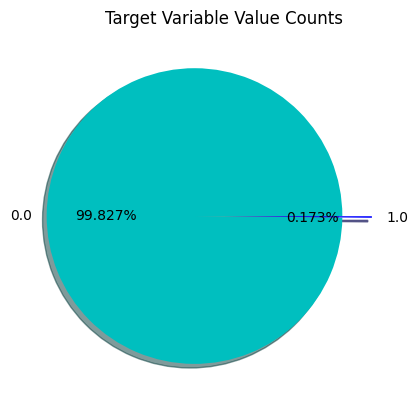

In [11]:
labels = big_raw_data.Class.unique()  # get the set of distinct classes
sizes = big_raw_data.Class.value_counts().values  # get the count of each class

plt.pie(sizes,
        labels=labels,
        autopct='%1.3f%%',
        shadow=True,
        explode=[0.2,0],
        colors=['c', 'b'])
plt.title('Target Variable Value Counts')
plt.show()

As shown above, the Class variable has two values: 0 (the credit card transaction is legitimate) and 1 (the credit card transaction is fraudulent). Thus, you need to _model a binary classification problem_. Moreover, the dataset is highly unbalanced, the target variable classes are not represented equally. This case requires special attention when training or when evaluating the quality of a model. One way of handing this case at train time is to bias the model to pay more attention to the samples in the minority class. The models under the current study will be configured to take into account the class weights of the samples at train/fit time.


The credit card transactions have different amounts. Here we plot a histogram that shows the distribution of these amounts. Print the range of these amounts (min/max) and the 90th percentile of the amount values.

Minimum amount value is  0.0
Maximum amount value is  25691.16
90% of the transactions have an amount less or equal than  203.0


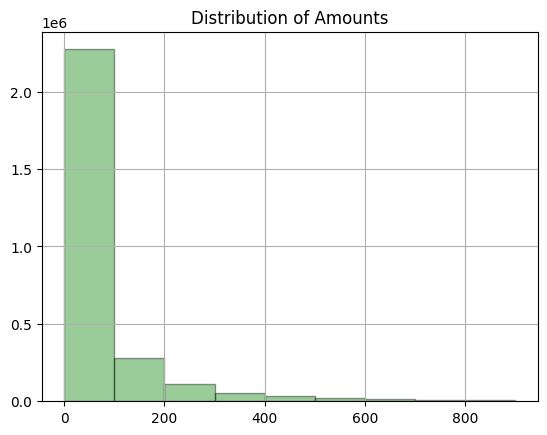

In [12]:
hist = big_raw_data.Amount.hist(alpha=0.4, color='green', edgecolor='black', bins=range(0,1000,100))
plt.title('Distribution of Amounts')

print("Minimum amount value is ", np.min(big_raw_data.Amount.values))
print("Maximum amount value is ", np.max(big_raw_data.Amount.values))
print("90% of the transactions have an amount less or equal than ", np.percentile(raw_data.Amount.values, 90))

plt.show()

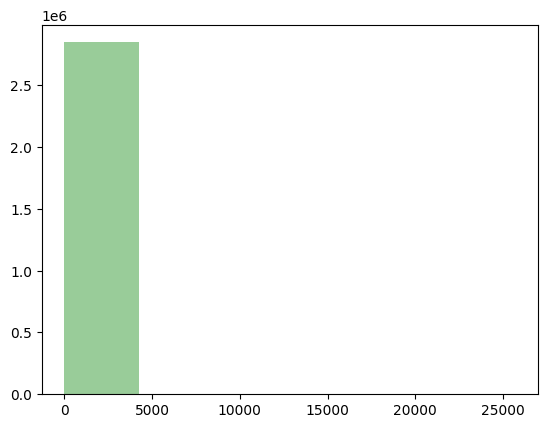

Minimum amount value is  0.0
Maximum amount value is  25691.16
90% of the transactions have an amount less or equal than  203.0


In [13]:
plt.hist(big_raw_data.Amount.values, 6, histtype='bar', facecolor='g', alpha=0.4)
plt.show()

print("Minimum amount value is ", np.min(big_raw_data.Amount.values))
print("Maximum amount value is ", np.max(big_raw_data.Amount.values))
print("90% of the transactions have an amount less or equal than ", np.percentile(raw_data.Amount.values, 90))

<div id="dataset_preprocessing">
    <h2>Dataset Preprocessing</h2>
</div>


In this subsection the data for training is prepared.


In [14]:
# data preprocessing such as scaling/normalization is typically useful for linear models to accelerate the training convergence

# standardize features by removing the mean and scaling to unit variance
big_raw_data.iloc[:, 1:30] = StandardScaler().fit_transform(big_raw_data.iloc[:, 1:30])
data_matrix = big_raw_data.values

# X: feature matrix (for this analysis, we exclude the Time variable from the dataset)
X = data_matrix[:, 1:30]

# y: labels vector
y = data_matrix[:, 30]

# data normalization
X = normalize(X, norm="l1")

# print the shape of the features matrix and the labels vector
print('X.shape=', X.shape, 'y.shape=', y.shape)

X.shape= (2848070, 29) y.shape= (2848070,)


<div id="dataset_split">
    <h2>Dataset Train/Test Split</h2>
</div>


Now that the dataset is ready for building the classification models, we will first divide the pre-processed dataset into a subset to be used for training the model (the train set) and a subset to be used for evaluating the quality of the model (the test set).


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (1993649, 29) Y_train.shape= (1993649,)
X_test.shape= (854421, 29) Y_test.shape= (854421,)


<div id="dt_sklearn">
    <h2>Build a Decision Tree Classifier model with Scikit-Learn</h2>
</div>


In [16]:
# compute the sample weights to be used as input to the train routine so that it takes into account the class imbalance present in this dataset
w_train = compute_sample_weight('balanced', y_train)

# import the Decision Tree Classifier Model from scikit-learn
from sklearn.tree import DecisionTreeClassifier

# for reproducible output across multiple function calls, set random_state to a given integer value
sklearn_dt = DecisionTreeClassifier(max_depth=4, random_state=35)

# train a Decision Tree Classifier using scikit-learn
t0 = time.time()
sklearn_dt.fit(X_train, y_train, sample_weight=w_train)
sklearn_time = time.time()-t0
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  60.18098


<div id="dt_snapml">
    <h2>Build a Decision Tree Classifier model with Snap ML</h2>
</div>


In [17]:
# if not already computed, compute the sample weights to be used as input to the train routine so that
# it takes into account the class imbalance present in this dataset w_train = compute_sample_weight('balanced', y_train)

# import the Decision Tree Classifier Model from Snap ML
from snapml import DecisionTreeClassifier

# Snap ML offers multi-threaded CPU/GPU training of decision trees, unlike scikit-learn
# to use the GPU, set the use_gpu parameter to True
# snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=45, use_gpu=True)

# to set the number of CPU threads used at training time, set the n_jobs parameter
# for reproducible output across multiple function calls, set random_state to a given integer value
snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=45, n_jobs=4)

# train a Decision Tree Classifier model using Snap ML
t0 = time.time()
snapml_dt.fit(X_train, y_train, sample_weight=w_train)
snapml_time = time.time()-t0
print("[Snap ML] Training time (s):  {0:.5f}".format(snapml_time))

[Snap ML] Training time (s):  6.50491


<div id="dt_sklearn_snapml">
    <h2>Evaluate the Scikit-Learn and Snap ML Decision Tree Classifier Models</h2>
</div>


In [18]:
# Snap ML vs Scikit-Learn training speedup
training_speedup = sklearn_time/snapml_time
print('[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : {0:.2f}x '.format(training_speedup))

# run inference and compute the probabilities of the test samples
# to belong to the class of fraudulent transactions
sklearn_pred = sklearn_dt.predict_proba(X_test)[:,1]

# evaluate the Compute Area Under the Receiver Operating Characteristic
# Curve (ROC-AUC) score from the predictions
sklearn_roc_auc = roc_auc_score(y_test, sklearn_pred)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc))

# run inference and compute the probabilities of the test samples
# to belong to the class of fraudulent transactions
snapml_pred = snapml_dt.predict_proba(X_test)[:,1]

# evaluate the Compute Area Under the Receiver Operating Characteristic
# Curve (ROC-AUC) score from the prediction scores
snapml_roc_auc = roc_auc_score(y_test, snapml_pred)
print('[Snap ML] ROC-AUC score : {0:.3f}'.format(snapml_roc_auc))

[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : 9.25x 
[Scikit-Learn] ROC-AUC score : 0.966
[Snap ML] ROC-AUC score : 0.966


As shown above both decision tree models provide the same score on the test dataset. However Snap ML runs the training routine 12x faster than Scikit-Learn. This is one of the advantages of using Snap ML: acceleration of training of classical machine learning models, such as linear and tree-based models. For more Snap ML examples, please visit [snapml-examples](https://ibm.biz/BdPfxP?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2022-01-01).


<div id="svm_sklearn">
    <h2>Build a Support Vector Machine model with Scikit-Learn</h2>
</div>


In [19]:
# import the linear Support Vector Machine (SVM) model from Scikit-Learn
from sklearn.svm import LinearSVC

# instatiate a scikit-learn SVM model
# to indicate the class imbalance at fit time, set class_weight='balanced'
# for reproducible output across multiple function calls, set random_state to a given integer value
sklearn_svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

# train a linear Support Vector Machine model using Scikit-Learn
t0 = time.time()
sklearn_svm.fit(X_train, y_train)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Training time (s):  {0:.2f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  109.65


<div id="svm_snap">
    <h2>Build a Support Vector Machine model with Snap ML</h2>
</div>


In [20]:
# import the Support Vector Machine model (SVM) from Snap ML
from snapml import SupportVectorMachine

# in contrast to scikit-learn's LinearSVC, Snap ML offers multi-threaded CPU/GPU training of SVMs
# to use the GPU, set the use_gpu parameter to True
# snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=25, use_gpu=True, fit_intercept=False)

# to set the number of threads used at training time, one needs to set the n_jobs parameter
snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=25, n_jobs=4, fit_intercept=False)
# print(snapml_svm.get_params())

# train an SVM model using Snap ML
t0 = time.time()
model = snapml_svm.fit(X_train, y_train)
snapml_time = time.time() - t0
print("[Snap ML] Training time (s):  {0:.2f}".format(snapml_time))

[Snap ML] Training time (s):  25.04


<div id="svm_sklearn_snap">
    <h2>Evaluate the Scikit-Learn and Snap ML Support Vector Machine Models</h2>
</div>


In [21]:
# compute the Snap ML vs Scikit-Learn training speedup
training_speedup = sklearn_time/snapml_time
print('[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : {0:.2f}x '.format(training_speedup))

# run inference using the Scikit-Learn model
# get the confidence scores for the test samples
sklearn_pred = sklearn_svm.decision_function(X_test)

# evaluate accuracy on test set
acc_sklearn  = roc_auc_score(y_test, sklearn_pred)
print("[Scikit-Learn] ROC-AUC score:   {0:.3f}".format(acc_sklearn))

# run inference using the Snap ML model
# get the confidence scores for the test samples
snapml_pred = snapml_svm.decision_function(X_test)

# evaluate accuracy on test set
acc_snapml  = roc_auc_score(y_test, snapml_pred)
print("[Snap ML] ROC-AUC score:   {0:.3f}".format(acc_snapml))

[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : 4.38x 
[Scikit-Learn] ROC-AUC score:   0.984
[Snap ML] ROC-AUC score:   0.985


As shown above both SVM models provide the same score on the test dataset. However, as in the case of decision trees, Snap ML runs the training routine faster than Scikit-Learn. For more Snap ML examples, please visit [snapml-examples](https://ibm.biz/BdPfxP?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2022-01-01). Moreover, as shown above, not only is Snap ML seemlessly accelerating scikit-learn applications, but the library's Python API is also compatible with scikit-learn metrics and data preprocessors.


### Practice


In this section you will evaluate the quality of the SVM models trained above using the [hinge loss metric](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hinge_loss.html). Run inference on the test set using both Scikit-Learn and Snap ML models. Compute the hinge loss metric for both sets of predictions. Print the hinge losses of Scikit-Learn and Snap ML.


In [22]:
# get the confidence scores for the test samples
sklearn_pred = sklearn_svm.decision_function(X_test)
snapml_pred  = snapml_svm.decision_function(X_test)

# import the hinge_loss metric from scikit-learn
from sklearn.metrics import hinge_loss

# evaluate the hinge loss from the predictions
loss_snapml = hinge_loss(y_test, snapml_pred)
print("[Snap ML] Hinge loss:   {0:.3f}".format(loss_snapml))

# evaluate the hinge loss metric from the predictions
loss_sklearn = hinge_loss(y_test, sklearn_pred)
print("[Scikit-Learn] Hinge loss:   {0:.3f}".format(loss_snapml))

# the two models should give the same Hinge loss

[Snap ML] Hinge loss:   0.228
[Scikit-Learn] Hinge loss:   0.228


In [ ]:
# Import required libraries
from snapml import RandomForestClassifier, LogisticRegression, SupportVectorMachine
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, hinge_loss, accuracy_score, precision_score, recall_score, f1_score
import time

# Train SVDD (emulated using SVM with Snap ML)
svdd_svm = SupportVectorMachine(class_weight='balanced', random_state=25, n_jobs=4, fit_intercept=False)
t0 = time.time()
svdd_svm.fit(X_train, y_train)
svdd_time = time.time() - t0
print("[Snap ML - SVDD] Training time (s): {0:.2f}".format(svdd_time))

# Evaluate SVDD
svdd_pred = svdd_svm.decision_function(X_test)
svdd_pred_binary = (svdd_pred > 0).astype(int)
roc_auc_svdd = roc_auc_score(y_test, svdd_pred)
acc_svdd = accuracy_score(y_test, svdd_pred_binary)
prec_svdd = precision_score(y_test, svdd_pred_binary)
rec_svdd = recall_score(y_test, svdd_pred_binary)
f1_svdd = f1_score(y_test, svdd_pred_binary)
print("[Snap ML - SVDD] ROC-AUC score: {0:.3f}".format(roc_auc_svdd))
print("[Snap ML - SVDD] Accuracy: {0:.3f}".format(acc_svdd))
print("[Snap ML - SVDD] Precision: {0:.3f}".format(prec_svdd))
print("[Snap ML - SVDD] Recall: {0:.3f}".format(rec_svdd))
print("[Snap ML - SVDD] F1 Score: {0:.3f}".format(f1_svdd))
hinge_loss_svdd = hinge_loss(y_test, svdd_pred)
print("[Snap ML - SVDD] Hinge loss: {0:.3f}".format(hinge_loss_svdd))

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=25, n_jobs=4)
t0 = time.time()
rf.fit(X_train, y_train)
rf_time = time.time() - t0
print("[Snap ML - RF] Training time (s): {0:.2f}".format(rf_time))

# Evaluate Random Forest
rf_pred = rf.predict_proba(X_test)[:, 1]
rf_pred_binary = rf.predict(X_test)
roc_auc_rf = roc_auc_score(y_test, rf_pred)
acc_rf = accuracy_score(y_test, rf_pred_binary)
prec_rf = precision_score(y_test, rf_pred_binary)
rec_rf = recall_score(y_test, rf_pred_binary)
f1_rf = f1_score(y_test, rf_pred_binary)
print("[Snap ML - RF] ROC-AUC score: {0:.3f}".format(roc_auc_rf))
print("[Snap ML - RF] Accuracy: {0:.3f}".format(acc_rf))
print("[Snap ML - RF] Precision: {0:.3f}".format(prec_rf))
print("[Snap ML - RF] Recall: {0:.3f}".format(rec_rf))
print("[Snap ML - RF] F1 Score: {0:.3f}".format(f1_rf))

# Train Logistic Regression
lr = LogisticRegression(class_weight='balanced', random_state=25, n_jobs=4)
t0 = time.time()
lr.fit(X_train, y_train)
lr_time = time.time() - t0
print("[Snap ML - LR] Training time (s): {0:.2f}".format(lr_time))

# Evaluate Logistic Regression
lr_pred = lr.predict_proba(X_test)[:, 1]

# If you need a decision function-like output, you can manually compute it from probabilities:
# lr_pred = np.log(lr_pred / (1 - lr_pred))  # This approximates the decision function

# The rest of your code should work as expected after this change.
lr_pred_binary = (lr_pred > 0.5).astype(int)  # Adjust the threshold if needed
roc_auc_lr = roc_auc_score(y_test, lr_pred)
acc_lr = accuracy_score(y_test, lr_pred_binary)
prec_lr = precision_score(y_test, lr_pred_binary)
rec_lr = recall_score(y_test, lr_pred_binary)
f1_lr = f1_score(y_test, lr_pred_binary)
print("[Snap ML - LR] ROC-AUC score: {0:.3f}".format(roc_auc_lr))
print("[Snap ML - LR] Accuracy: {0:.3f}".format(acc_lr))
print("[Snap ML - LR] Precision: {0:.3f}".format(prec_lr))
print("[Snap ML - LR] Recall: {0:.3f}".format(rec_lr))
print("[Snap ML - LR] F1 Score: {0:.3f}".format(f1_lr))
hinge_loss_lr = hinge_loss(y_test, lr_pred)
print("[Snap ML - LR] Hinge loss: {0:.3f}".format(hinge_loss_lr))

# Train K-Nearest Neighbors (using Scikit-Learn as Snap ML does not support KNN)
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=4)
t0 = time.time()
knn.fit(X_train, y_train)
knn_time = time.time() - t0
print("[Scikit-Learn - KNN] Training time (s): {0:.2f}".format(knn_time))

# Evaluate K-Nearest Neighbors
knn_pred = knn.predict_proba(X_test)[:, 1]
knn_pred_binary = knn.predict(X_test)
roc_auc_knn = roc_auc_score(y_test, knn_pred)
acc_knn = accuracy_score(y_test, knn_pred_binary)
prec_knn = precision_score(y_test, knn_pred_binary)
rec_knn = recall_score(y_test, knn_pred_binary)
f1_knn = f1_score(y_test, knn_pred_binary)
print("[Scikit-Learn - KNN] ROC-AUC score: {0:.3f}".format(roc_auc_knn))
print("[Scikit-Learn - KNN] Accuracy: {0:.3f}".format(acc_knn))
print("[Scikit-Learn - KNN] Precision: {0:.3f}".format(prec_knn))
print("[Scikit-Learn - KNN] Recall: {0:.3f}".format(rec_knn))
print("[Scikit-Learn - KNN] F1 Score: {0:.3f}".format(f1_knn))

# Train Support Vector Machine (Scikit-Learn)
svm = SVC(kernel='linear', probability=True, random_state=25)
t0 = time.time()
svm.fit(X_train, y_train)
svm_time = time.time() - t0
print("[Scikit-Learn - SVM] Training time (s): {0:.2f}".format(svm_time))

# Evaluate Support Vector Machine
svm_pred = svm.predict_proba(X_test)[:, 1]
svm_pred_binary = svm.predict(X_test)
roc_auc_svm = roc_auc_score(y_test, svm_pred)
acc_svm = accuracy_score(y_test, svm_pred_binary)
prec_svm = precision_score(y_test, svm_pred_binary)
rec_svm = recall_score(y_test, svm_pred_binary)
f1_svm = f1_score(y_test, svm_pred_binary)
print("[Scikit-Learn - SVM] ROC-AUC score: {0:.3f}".format(roc_auc_svm))
print("[Scikit-Learn - SVM] Accuracy: {0:.3f}".format(acc_svm))
print("[Scikit-Learn - SVM] Precision: {0:.3f}".format(prec_svm))
print("[Scikit-Learn - SVM] Recall: {0:.3f}".format(rec_svm))
print("[Scikit-Learn - SVM] F1 Score: {0:.3f}".format(f1_svm))

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=25)
t0 = time.time()
dt.fit(X_train, y_train)
dt_time = time.time() - t0
print("[Scikit-Learn - DT] Training time (s): {0:.2f}".format(dt_time))

# Evaluate Decision Tree
dt_pred = dt.predict_proba(X_test)[:, 1]
dt_pred_binary = dt.predict(X_test)
roc_auc_dt = roc_auc_score(y_test, dt_pred)
acc_dt = accuracy_score(y_test, dt_pred_binary)
prec_dt = precision_score(y_test, dt_pred_binary)
rec_dt = recall_score(y_test, dt_pred_binary)
f1_dt = f1_score(y_test, dt_pred_binary)
print("[Scikit-Learn - DT] ROC-AUC score: {0:.3f}".format(roc_auc_dt))
print("[Scikit-Learn - DT] Accuracy: {0:.3f}".format(acc_dt))
print("[Scikit-Learn - DT] Precision: {0:.3f}".format(prec_dt))
print("[Scikit-Learn - DT] Recall: {0:.3f}".format(rec_dt))
print("[Scikit-Learn - DT] F1 Score: {0:.3f}".format(f1_dt))

# Print summary
print("\nSummary of Model Performances:")
print("SVDD: ROC-AUC: {0:.3f}, Accuracy: {1:.3f}, Precision: {2:.3f}, Recall: {3:.3f}, F1 Score: {4:.3f}, Hinge Loss: {5:.3f}".format(roc_auc_svdd, acc_svdd, prec_svdd, rec_svdd, f1_svdd, hinge_loss_svdd))
print("Random Forest: ROC-AUC: {0:.3f}, Accuracy: {1:.3f}, Precision: {2:.3f}, Recall: {3:.3f}, F1 Score: {4:.3f}".format(roc_auc_rf, acc_rf, prec_rf, rec_rf, f1_rf))
print("Logistic Regression: ROC-AUC: {0:.3f}, Accuracy: {1:.3f}, Precision: {2:.3f}, Recall: {3:.3f}, F1 Score: {4:.3f}, Hinge Loss: {5:.3f}".format(roc_auc_lr, acc_lr, prec_lr, rec_lr, f1_lr, hinge_loss_lr))
print("KNN: ROC-AUC: {0:.3f}, Accuracy: {1:.3f}, Precision: {2:.3f}, Recall: {3:.3f}, F1 Score: {4:.3f}".format(roc_auc_knn, acc_knn, prec_knn, rec_knn, f1_knn))
print("SVM: ROC-AUC: {0:.3f}, Accuracy: {1:.3f}, Precision: {2:.3f}, Recall: {3:.3f}, F1 Score: {4:.3f}".format(roc_auc_svm, acc_svm, prec_svm, rec_svm, f1_svm))
print("Decision Tree: ROC-AUC: {0:.3f}, Accuracy: {1:.3f}, Precision: {2:.3f}, Recall: {3:.3f}, F1 Score: {4:.3f}".format(roc_auc_dt, acc_dt, prec_dt, rec_dt, f1_dt))


[Snap ML - SVDD] Training time (s): 31.49
[Snap ML - SVDD] ROC-AUC score: 0.985
[Snap ML - SVDD] Accuracy: 0.947
[Snap ML - SVDD] Precision: 0.030
[Snap ML - SVDD] Recall: 0.935
[Snap ML - SVDD] F1 Score: 0.057
[Snap ML - SVDD] Hinge loss: 0.228
[Snap ML - RF] Training time (s): 673.88
[Snap ML - RF] ROC-AUC score: 1.000
[Snap ML - RF] Accuracy: 1.000
[Snap ML - RF] Precision: 1.000
[Snap ML - RF] Recall: 1.000
[Snap ML - RF] F1 Score: 1.000
[Snap ML - LR] Training time (s): 21.36
[Snap ML - LR] ROC-AUC score: 0.985
[Snap ML - LR] Accuracy: 0.885
[Snap ML - LR] Precision: 0.014
[Snap ML - LR] Recall: 0.967
[Snap ML - LR] F1 Score: 0.028
[Snap ML - LR] Hinge loss: 1.295


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7c5b9ec4a710>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error
Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7c5b9ec4a710>
Traceback (most recent call last

[Scikit-Learn - KNN] Training time (s): 0.21


In [ ]:
# Evaluate SVDD
svdd_pred = svdd_svm.decision_function(X_test)
svdd_pred_binary = (svdd_pred > 0).astype(int)
roc_auc_svdd = roc_auc_score(y_test, svdd_pred)
acc_svdd = accuracy_score(y_test, svdd_pred_binary)
prec_svdd = precision_score(y_test, svdd_pred_binary)
rec_svdd = recall_score(y_test, svdd_pred_binary)
f1_svdd = f1_score(y_test, svdd_pred_binary)
print("[Snap ML - SVDD] ROC-AUC score: {0:.3f}".format(roc_auc_svdd))
print("[Snap ML - SVDD] Accuracy: {0:.3f}".format(acc_svdd))
print("[Snap ML - SVDD] Precision: {0:.3f}".format(prec_svdd))
print("[Snap ML - SVDD] Recall: {0:.3f}".format(rec_svdd))
print("[Snap ML - SVDD] F1 Score: {0:.3f}".format(f1_svdd))
hinge_loss_svdd = hinge_loss(y_test, svdd_pred)
print("[Snap ML - SVDD] Hinge loss: {0:.3f}".format(hinge_loss_svdd))

In [ ]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=25, n_jobs=4)
t0 = time.time()
rf.fit(X_train, y_train)
rf_time = time.time() - t0
print("[Snap ML - RF] Training time (s): {0:.2f}".format(rf_time))

# Evaluate Random Forest
rf_pred = rf.predict_proba(X_test)[:, 1]
rf_pred_binary = rf.predict(X_test)
roc_auc_rf = roc_auc_score(y_test, rf_pred)
acc_rf = accuracy_score(y_test, rf_pred_binary)
prec_rf = precision_score(y_test, rf_pred_binary)
rec_rf = recall_score(y_test, rf_pred_binary)
f1_rf = f1_score(y_test, rf_pred_binary)
print("[Snap ML - RF] ROC-AUC score: {0:.3f}".format(roc_auc_rf))
print("[Snap ML - RF] Accuracy: {0:.3f}".format(acc_rf))
print("[Snap ML - RF] Precision: {0:.3f}".format(prec_rf))
print("[Snap ML - RF] Recall: {0:.3f}".format(rec_rf))
print("[Snap ML - RF] F1 Score: {0:.3f}".format(f1_rf))

In [ ]:
# Train Logistic Regression
lr = LogisticRegression(class_weight='balanced', random_state=25, n_jobs=4)
t0 = time.time()
lr.fit(X_train, y_train)
lr_time = time.time() - t0
print("[Snap ML - LR] Training time (s): {0:.2f}".format(lr_time))

# Evaluate Logistic Regression
lr_pred = lr.predict_proba(X_test)[:, 1]

# If you need a decision function-like output, you can manually compute it from probabilities:
# lr_pred = np.log(lr_pred / (1 - lr_pred))  # This approximates the decision function

# The rest of your code should work as expected after this change.
lr_pred_binary = (lr_pred > 0.5).astype(int)  # Adjust the threshold if needed
roc_auc_lr = roc_auc_score(y_test, lr_pred)
acc_lr = accuracy_score(y_test, lr_pred_binary)
prec_lr = precision_score(y_test, lr_pred_binary)
rec_lr = recall_score(y_test, lr_pred_binary)
f1_lr = f1_score(y_test, lr_pred_binary)
print("[Snap ML - LR] ROC-AUC score: {0:.3f}".format(roc_auc_lr))
print("[Snap ML - LR] Accuracy: {0:.3f}".format(acc_lr))
print("[Snap ML - LR] Precision: {0:.3f}".format(prec_lr))
print("[Snap ML - LR] Recall: {0:.3f}".format(rec_lr))
print("[Snap ML - LR] F1 Score: {0:.3f}".format(f1_lr))
hinge_loss_lr = hinge_loss(y_test, lr_pred)
print("[Snap ML - LR] Hinge loss: {0:.3f}".format(hinge_loss_lr))

In [ ]:
# Train K-Nearest Neighbors (using Scikit-Learn as Snap ML does not support KNN)
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=4)
t0 = time.time()
knn.fit(X_train, y_train)
knn_time = time.time() - t0
print("[Scikit-Learn - KNN] Training time (s): {0:.2f}".format(knn_time))

# Evaluate K-Nearest Neighbors
knn_pred = knn.predict_proba(X_test)[:, 1]
knn_pred_binary = knn.predict(X_test)
roc_auc_knn = roc_auc_score(y_test, knn_pred)
acc_knn = accuracy_score(y_test, knn_pred_binary)
prec_knn = precision_score(y_test, knn_pred_binary)
rec_knn = recall_score(y_test, knn_pred_binary)
f1_knn = f1_score(y_test, knn_pred_binary)
print("[Scikit-Learn - KNN] ROC-AUC score: {0:.3f}".format(roc_auc_knn))
print("[Scikit-Learn - KNN] Accuracy: {0:.3f}".format(acc_knn))
print("[Scikit-Learn - KNN] Precision: {0:.3f}".format(prec_knn))
print("[Scikit-Learn - KNN] Recall: {0:.3f}".format(rec_knn))
print("[Scikit-Learn - KNN] F1 Score: {0:.3f}".format(f1_knn))

In [ ]:
# Train Support Vector Machine (Scikit-Learn)
svm = SVC(kernel='linear', probability=True, random_state=25)
t0 = time.time()
svm.fit(X_train, y_train)
svm_time = time.time() - t0
print("[Scikit-Learn - SVM] Training time (s): {0:.2f}".format(svm_time))

# Evaluate Support Vector Machine
svm_pred = svm.predict_proba(X_test)[:, 1]
svm_pred_binary = svm.predict(X_test)
roc_auc_svm = roc_auc_score(y_test, svm_pred)
acc_svm = accuracy_score(y_test, svm_pred_binary)
prec_svm = precision_score(y_test, svm_pred_binary)
rec_svm = recall_score(y_test, svm_pred_binary)
f1_svm = f1_score(y_test, svm_pred_binary)
print("[Scikit-Learn - SVM] ROC-AUC score: {0:.3f}".format(roc_auc_svm))
print("[Scikit-Learn - SVM] Accuracy: {0:.3f}".format(acc_svm))
print("[Scikit-Learn - SVM] Precision: {0:.3f}".format(prec_svm))
print("[Scikit-Learn - SVM] Recall: {0:.3f}".format(rec_svm))
print("[Scikit-Learn - SVM] F1 Score: {0:.3f}".format(f1_svm))

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=25)
t0 = time.time()
dt.fit(X_train, y_train)
dt_time = time.time() - t0
print("[Scikit-Learn - DT] Training time (s): {0:.2f}".format(dt_time))


In [ ]:
# Evaluate Decision Tree
dt_pred = dt.predict_proba(X_test)[:, 1]
dt_pred_binary = dt.predict(X_test)
roc_auc_dt = roc_auc_score(y_test, dt_pred)
acc_dt = accuracy_score(y_test, dt_pred_binary)
prec_dt = precision_score(y_test, dt_pred_binary)
rec_dt = recall_score(y_test, dt_pred_binary)
f1_dt = f1_score(y_test, dt_pred_binary)
print("[Scikit-Learn - DT] ROC-AUC score: {0:.3f}".format(roc_auc_dt))
print("[Scikit-Learn - DT] Accuracy: {0:.3f}".format(acc_dt))
print("[Scikit-Learn - DT] Precision: {0:.3f}".format(prec_dt))
print("[Scikit-Learn - DT] Recall: {0:.3f}".format(rec_dt))
print("[Scikit-Learn - DT] F1 Score: {0:.3f}".format(f1_dt))

In [ ]:
# Print summary
print("\nSummary of Model Performances:")
print("SVDD: ROC-AUC: {0:.3f}, Accuracy: {1:.3f}, Precision: {2:.3f}, Recall: {3:.3f}, F1 Score: {4:.3f}, Hinge Loss: {5:.3f}".format(roc_auc_svdd, acc_svdd, prec_svdd, rec_svdd, f1_svdd, hinge_loss_svdd))
print("Random Forest: ROC-AUC: {0:.3f}, Accuracy: {1:.3f}, Precision: {2:.3f}, Recall: {3:.3f}, F1 Score: {4:.3f}".format(roc_auc_rf, acc_rf, prec_rf, rec_rf, f1_rf))
print("Logistic Regression: ROC-AUC: {0:.3f}, Accuracy: {1:.3f}, Precision: {2:.3f}, Recall: {3:.3f}, F1 Score: {4:.3f}, Hinge Loss: {5:.3f}".format(roc_auc_lr, acc_lr, prec_lr, rec_lr, f1_lr, hinge_loss_lr))
print("KNN: ROC-AUC: {0:.3f}, Accuracy: {1:.3f}, Precision: {2:.3f}, Recall: {3:.3f}, F1 Score: {4:.3f}".format(roc_auc_knn, acc_knn, prec_knn, rec_knn, f1_knn))
print("SVM: ROC-AUC: {0:.3f}, Accuracy: {1:.3f}, Precision: {2:.3f}, Recall: {3:.3f}, F1 Score: {4:.3f}".format(roc_auc_svm, acc_svm, prec_svm, rec_svm, f1_svm))
print("Decision Tree: ROC-AUC: {0:.3f}, Accuracy: {1:.3f}, Precision: {2:.3f}, Recall: {3:.3f}, F1 Score: {4:.3f}".format(roc_auc_dt, acc_dt, prec_dt, rec_dt, f1_dt))
